1.0
(194, 205) (194, 205)
(39770,) (39770,)
(194, 205)


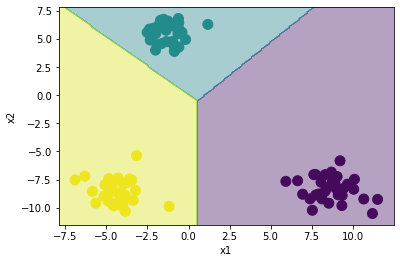

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import numpy as np

#퍼셉트론 생성. tol는 종료 조건. random_state는 난수의 시드.
clf = linear_model.Perceptron(tol=1e-3, random_state=0)
#clf = classifier(분류기)
#뭉쳐진 데이터를 만든다. 샘플의 개수는 총 100개, 클러스터의 개수는 2개.
X,y = datasets.make_blobs(n_samples=100, centers=3, n_features=2)
# make_blobs : 가상의 군집 생성 centers의 개수
clf.fit(X,y)

from sklearn.metrics import accuracy_score
print(accuracy_score(clf.predict(X),y))

#데이터를 그래프 위에 표시.
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.xlabel("x1")
plt.ylabel("x2")

#데이터에서 최소 좌표와 최대 좌표를 계산한다. +-1로 그래프에 마진을 준다.
x_min, x_max = X[:,0].min() - 1, X[:,0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:,1].max() +1

#0.1간격으로 메쉬 그리드 좌표를 만든다.
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.1),np.arange(y_min,y_max,0.1))
print(xx.shape, yy.shape)
print(xx.ravel().shape,yy.ravel().shape)

#메쉬 그리드 데이터에 대하여 예측을 한다. Z축 생성(0,1,2)
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

#컨투어를 그린다. meshgrid로 나온 데이터들을 3차축을 이용해서 영역을 나누어준다.
print(Z.shape)
plt.contourf(xx,yy,Z,alpha=0.4) #alpha : blending시켜주기 위한 값
plt.show()

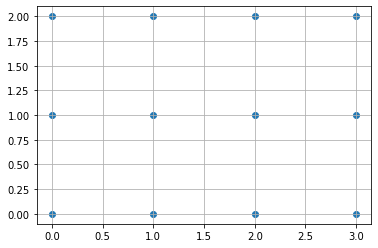

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x, y =np.meshgrid([0.,1.,2.,3.] , [0.,1.,2.])
#print(x.ravel()) #배열을 펼치는 함수
#print(y.ravel())
#print(np1 = np.c_[x.ravel(),y.ravel()]) # np.c_[] : 1차원 column 2개를 결합하는 함수
#print(np.column_stack((x.ravel(),y.ravel()))) # 방법2 x와 y를 묶어주고 column_stack 사용
np1 = np.vstack((x.ravel(),y.ravel()))
np1 = np1.T #방법3 : vstack으로 수직으로 붙여준다음 전치한다.

plt.scatter(np1[:,0],np1[:,1])
plt.grid()
plt.show()

# concatenate 함수 정리
# np.hstack([A,B]) -> np.r_[A,B] A와B를 행으로 붙여라.(horizon) 행렬을 리스트나 튜플로 묶어서 사용.
# np.vstack([A,B]) -> np.r_[[A],[B]] A와B를 열로 붙여라. (vertical)
# np.c_[] : 열 하나만 묶을때 ex)1차원배열
# np.concatenate((A,B),axis=0) : A와 B를 행으로 붙여라
# np.concatenate((A,B),axis=1) : A와 B를 열로 붙여라


pandas의 데이터 타입 : value, index, column

전체 : DataFrame

index + value : series

In [5]:
# P40-0005

import numpy as np
import pandas as pd

#방법1
np1 = np.arange(3*4).reshape(3,4)

#np.sum(np1,axis=0)>=15

np2 = np1[:,np.sum(np1,axis=0)>=15]
print(np2)
#numpy를 사용할 땐, for문 사용x
#방법2
df1 = pd.DataFrame(np1)

# df1.columns = ["A1","B1","C1","D1"]
# df1['A1'] #indexing 열선택 방법1
# df1.A1 #열선택 방법2
# df1.loc[:,'A1'] #행과 열의 조합 열선택 방법3
# df1.iloc[:,0] #열선택 방법4
# df1.loc[:,['A1','C1']] #복수열 선택 방법1
# df1.iloc[:,[0,2]] #복수열 선택 방법2

print(df1.loc[:,df1.sum(axis=0) >= 15])


[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]
   1   2   3
0  1   2   3
1  5   6   7
2  9  10  11


In [ ]:
#Boolean Indexing

import numpy as np

np1 = np.arange(0,5)
np1[np1>2]
np1>2

array([False, False, False,  True,  True])

In [14]:
#P40-0006
import numpy as np

np1 = np.arange(3*4).reshape(3,4)
# print(np.sum(np1,axis=0))
# print(np.sum(np1,axis=1))

np2 = np.vstack([np1,np1.sum(axis=0)])
np3 = np.hstack([np2,np2.sum(axis=1,keepdims=True)])
print(np3)

#방법2
df1 = pd.DataFrame(np1,index = list('abc'),columns=list("ABCD"))
# df1

df2 = df1.append(pd.DataFrame(df1.sum(axis=0)).T) #행추가방법

df2['E'] = df2.sum(axis=1)  #열추가방법
print(df2)

dict = {} #key:value의 조합


[[ 0  1  2  3  6]
 [ 4  5  6  7 22]
 [ 8  9 10 11 38]
 [12 15 18 21 66]]
    A   B   C   D   E
a   0   1   2   3   6
b   4   5   6   7  22
c   8   9  10  11  38
0  12  15  18  21  66


[12 15 18 21]
